# Disaster Tweets Using KerasNLP and Pretrained BERT

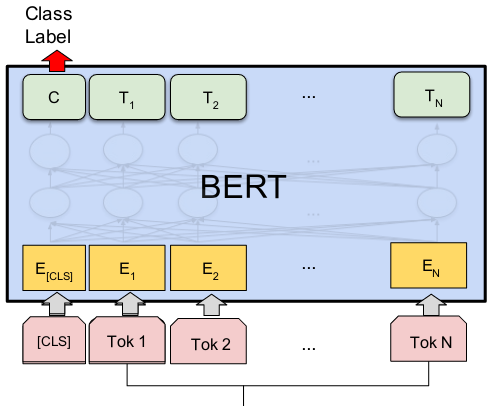

In [1]:
import os

os.environ['KERAS_BACKEND'] = 'tensorflow'

## Lib Imports

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras_core as keras
import keras_nlp
import keras_core as keras
import seaborn as sns
import matplotlib.pyplot as plt

2024-07-24 06:38:57.488356: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-24 06:38:57.491525: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-24 06:38:57.502500: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 06:38:57.520085: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 06:38:57.525091: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-24 06:38:57.538073: I tensorflow/core/platform/cpu_feature_gu

Using TensorFlow backend


/home/mbarbaric/dev/ai_projects/kaggle/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
from nltk.corpus import stopwords
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

ENGLISH_STOPWORDS = set(stopwords.words('english'))

# Local Helper Method Imports

Adding local path to sys path to add lib

In [4]:
import sys
from pathlib import Path

current_path = Path.cwd()
print(f"current_path: {current_path}")
sys.path.append(current_path)

current_path: /home/mbarbaric/dev/ai_projects/kaggle/disaster_tweets


In [5]:
from disaster_tweet_helpers import preprocess_text

# Constants

In [28]:
RANDOM_STATE = 42
TEST_SIZE = 0.2
BATCH_SIZE = 32
Y_COLUMN = 'target'

## 1. Dataset Loading and Analysis

### 1.1 Train and Test Dataset Loading

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [7]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### 1.2 EDA

In [9]:
train_df['preprocessed_text'] = train_df['text'].apply(lambda x: preprocess_text(x, ENGLISH_STOPWORDS))
train_df.head()

,id,keyword,location,text,target,preprocessed_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


In [12]:
train_df['length'] = train_df['preprocessed_text'].apply(lambda x: len(x.split(' ')))
train_df.head()

,id,keyword,location,text,target,preprocessed_text,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us,7
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...,11
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...,6
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...,9


<Axes: >

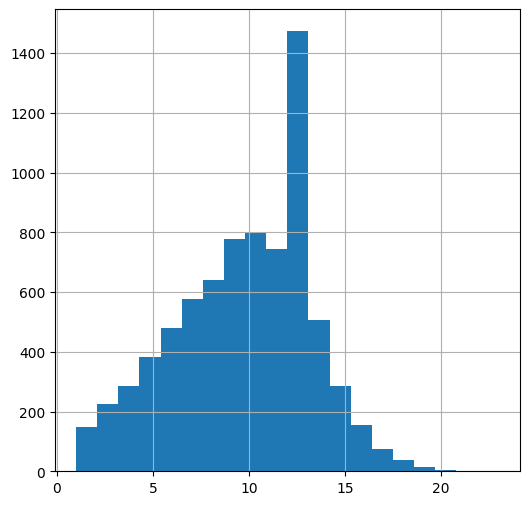

In [25]:
train_df['length'].hist(bins=20, figsize=(6, 6))

In [18]:
train_df['length'].describe()

count    7613.000000
mean        9.691712
std         3.526706
min         1.000000
25%         7.000000
50%        10.000000
75%        12.000000
max        23.000000
Name: length, dtype: float64

In [31]:
X = train_df['preprocessed_text']
y = train_df[Y_COLUMN]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

## 2. Model Loading and Fine Tuning

In [27]:
preset = 'distil_bert_base_en_uncased'
classifier = keras_nlp.models.DistilBertClassifier.from_preset(preset, num_classes=2)
classifier.summary()

100%|██████████| 140/140 [00:00<00:00, 43.7kB/s]


100%|██████████| 515/515 [00:00<00:00, 1.14MB/s]


100%|██████████| 253M/253M [01:06<00:00, 4.01MB/s] 


100%|██████████| 580/580 [00:00<00:00, 671kB/s]


100%|██████████| 226k/226k [00:00<00:00, 561kB/s]


Preprocessor: "distil_bert_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)        │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "distil_bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 66,955,010 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

### 2.2 Model Fine Tuning

In [34]:
classifier.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-5),
    metrics=['accuracy']
)

history = classifier.fit(x=X_train,
                         y=y_train,
                         batch_size=BATCH_SIZE,
                         epochs=2,
                         validation_data=(X_test, y_test),
                         verbose=True)

Epoch 1/2


2024-07-24 06:54:50.344737: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.
2024-07-24 06:54:50.868764: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.
2024-07-24 06:54:52.370472: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.
2024-07-24 06:54:52.370619: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.
2024-07-24 06:55:03.395308: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 402653184 exceeds 10% of free system memory.


: 